# Action1_ARIMA预测美吉姆股票

In [1]:
# -*- coding: utf-8 -*-
# 沪指数走势预测，使用时间序列ARIMA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import warnings
from itertools import product
from datetime import datetime, timedelta
import calendar

warnings.filterwarnings('ignore') # 忽略报错
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示matplotlib图中的中文

In [19]:
# 数据加载
df = pd.read_csv('./002621.csv')
df = df[['日期', '开盘价']]
df.rename(columns = {"日期": "Timestamp", "开盘价":"Price"},  inplace=True)
df

,Timestamp,Price
0,2020/10/16,7.00
1,2020/10/15,7.02
2,2020/10/14,6.93
3,2020/10/13,6.95
4,2020/10/12,6.99
...,...,...
2191,2011/10/12,23.60
2192,2011/10/11,24.25
2193,2011/10/10,22.66
2194,2011/9/30,23.10


In [20]:
# 去掉0值
df = df.replace(0,np.nan)
# df.dropna(inplace=True)
df

,Timestamp,Price
0,2020/10/16,7.00
1,2020/10/15,7.02
2,2020/10/14,6.93
3,2020/10/13,6.95
4,2020/10/12,6.99
...,...,...
2191,2011/10/12,23.60
2192,2011/10/11,24.25
2193,2011/10/10,22.66
2194,2011/9/30,23.10


In [21]:
# 将时间作为df的索引
df.Timestamp = pd.to_datetime(df.Timestamp)
df.index = df.Timestamp
df

,Timestamp,Price
Timestamp,,
2020-10-16,2020-10-16,7.00
2020-10-15,2020-10-15,7.02
2020-10-14,2020-10-14,6.93
2020-10-13,2020-10-13,6.95
2020-10-12,2020-10-12,6.99
...,...,...
2011-10-12,2011-10-12,23.60
2011-10-11,2011-10-11,24.25
2011-10-10,2011-10-10,22.66


In [41]:
# df按天
# 按照月，季度，年来统计
df_month = df.resample('M').mean()
df_Q = df.resample('Q-DEC').mean()
df_year = df.resample('A-DEC').mean()
df_month

,Price
Timestamp,
2011-09-30,23.540000
2011-10-31,24.991875
2011-11-30,26.670909
2011-12-31,23.110909
2012-01-31,20.176667
...,...
2020-06-30,7.238500
2020-07-31,7.068261
2020-08-31,7.261429


In [29]:
# 这里不能dropna，否则后面预测会为空值
# df_month.dropna(inplace=True)
# df_month

,Price
Timestamp,
2011-09-30,23.540000
2011-10-31,24.991875
2011-11-30,26.670909
2011-12-31,23.110909
2012-01-31,20.176667
...,...
2020-06-30,7.238500
2020-07-31,7.068261
2020-08-31,7.261429


In [36]:
df[['Price']].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2020-10-16 to 2011-09-29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   1963 non-null   float64
dtypes: float64(1)
memory usage: 34.3 KB


In [52]:
# 进行假设检验-->adf检验
# from statsmodels.tsa.stattools import adfuller
# adf_result = adfuller(df_month.dropna().Price)
# adf_result  # 0.2未拒绝，趋势太明显，需要差分平了它-->目标是0.05以下

(-2.2146259747095813,
 0.20097996142682156,
 3,
 99,
 {'1%': -3.498198082189098,
  '5%': -2.891208211860468,
  '10%': -2.5825959973472097},
 386.0978397996492)

In [50]:
# ARMA找p、q
# 这里df_month不能有空行
# import warnings
# warnings.filterwarnings('ignore')
# import statsmodels.api as stm
# ic_result = stm.tsa.arma_order_select_ic(df_month.Price,max_ar=5,max_ma=5,ic=['aic'])   #阶选择器,选择出 ARMA yt中最合适的的p,q值
# ic_result.aic_min_order

In [86]:
# p，q带入ARMA模型--
# from statsmodels.tsa.arima_model import ARMA 
# best_model=ARMA(df_month.Price,order=(1,0)).fit()
# best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Price   No. Observations:                  103
Model:                     ARMA(1, 0)   Log Likelihood                -230.539
Method:                       css-mle   S.D. of innovations              2.249
Date:                Tue, 20 Oct 2020   AIC                            467.079
Time:                        19:54:10   BIC                            474.983
Sample:                             0   HQIC                           470.280
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          16.0753      2.472      6.503      0.000      11.230      20.921
ar.L1.Price     0.9188      0.040     23.036      0.000       0.841       0.997
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0884           +0.0000j            1.0884            0.0000
-----------------------------------------------------------------------------
"""

In [42]:
# 设置参数范围
ps = range(0, 5)
qs = range(0, 5)
ds = range(1, 2)
parameters = product(ps, ds, qs)
parameters_list = list(parameters)

In [43]:
parameters_list

[(0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3),
 (3, 1, 4),
 (4, 1, 0),
 (4, 1, 1),
 (4, 1, 2),
 (4, 1, 3),
 (4, 1, 4)]

In [44]:
# 寻找最优ARIMA模型参数，即best_aic最小
results = []
best_aic = float("inf") # 正无穷
for param in parameters_list:
    try:
        #model = ARIMA(df_month.Price,order=(param[0], param[1], param[2])).fit()
        # SARIMAX 包含季节趋势因素的ARIMA模型
        model = sm.tsa.statespace.SARIMAX(df_month.Price,  
                                order=(param[0], param[1], param[2]),
                                #seasonal_order=(4, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False).fit()

    except ValueError:
        print('参数错误:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])
# 输出最优模型
print('最优模型: ', best_model.summary())

最优模型:                                 SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                  110
Model:               SARIMAX(2, 1, 4)   Log Likelihood                -207.814
Date:                Tue, 20 Oct 2020   AIC                            429.627
Time:                        20:12:12   BIC                            448.138
Sample:                    09-30-2011   HQIC                           437.127
                         - 10-31-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5841      0.198     -2.950      0.003      -0.972      -0.196
ar.L2         -0.6810      0.125     -5.443      0.000      -0.926      -0.436
ma.L1          0.7208      0.228      3.163  

In [66]:
# 设置future_month，需要预测的时间date_list
# 2020-11-30	NaN
# 2020-12-31	NaN
# 2021-01-31	NaN
df_month2 = df_month[['Price']]
future_month = 3
last_month = pd.to_datetime(df_month2.index[len(df_month2)-1])
df_month2
date_list = []
for i in range(future_month):
    # 计算下个月有多少天
    year = last_month.year
    month = last_month.month
    if month == 12:
        month = 1
        year = year+1
    else:
        month = month + 1
    next_month_days = calendar.monthrange(year, month)[1]
    #print(next_month_days)
    last_month = last_month + timedelta(days=next_month_days)
    date_list.append(last_month)
print('date_list=', date_list)

date_list= [Timestamp('2020-11-30 00:00:00', freq='M'), Timestamp('2020-12-31 00:00:00', freq='M'), Timestamp('2021-01-31 00:00:00', freq='M')]


In [60]:
# 添加未来要预测的3个月
future = pd.DataFrame(index=date_list, columns= df_month.columns)
df_month2 = pd.concat([df_month2, future])
df_month2

,Price
2011-09-30,23.540000
2011-10-31,24.991875
2011-11-30,26.670909
2011-12-31,23.110909
2012-01-31,20.176667
...,...
2020-09-30,6.767273
2020-10-31,6.936667
2020-11-30,NaN
2020-12-31,NaN


In [63]:
# get_prediction得到的是区间，使用predicted_mean,第一个设置值为0
df_month2['forecast'] = best_model.get_prediction(start=0, end=len(df_month2)).predicted_mean

In [64]:
df_month2

,Price,forecast
2011-09-30,23.540000,0.000000
2011-10-31,24.991875,16.664609
2011-11-30,26.670909,17.543167
2011-12-31,23.110909,24.701423
2012-01-31,20.176667,24.047041
...,...,...
2020-09-30,6.767273,7.432981
2020-10-31,6.936667,6.634274
2020-11-30,NaN,6.795396
2020-12-31,NaN,7.004314


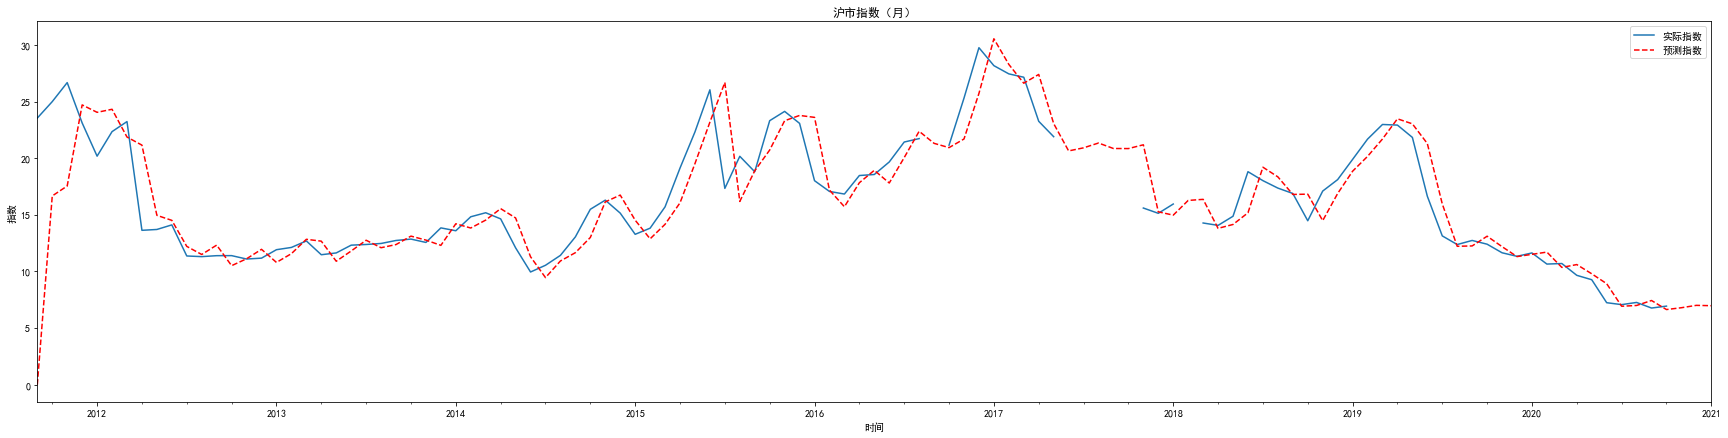

In [65]:
# 预测结果显示
plt.figure(figsize=(30,7))
df_month2.Price.plot(label='实际指数')
df_month2.forecast.plot(color='r', ls='--', label='预测指数')
plt.legend()
plt.title('指数（月）')
plt.xlabel('时间')
plt.ylabel('指数')
plt.show()